<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA%20%D0%B7%D0%B0%D0%B2%D0%B8%D1%81%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B9%20%D1%87%D0%B0%D1%81%D1%82%D0%BE%D1%82%D1%8B%20%D0%BF%D0%BE%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B2%20%D0%BE%D1%82%20%D0%B4%D0%B8%D0%B0%D0%BF%D0%B0%D0%B7%D0%BE%D0%BD%D0%BE%D0%B2%20T-Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-7fdc41394422>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_grouped = student_df.groupby("T-Score Range")["Frequency"].mean()
<ipython-input-5-7fdc41394422>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  literature_grouped = literature_df.groupby("T-Score Range")["Frequency"].mean()


Средняя частота повторов по диапазонам T-Score для студенческих текстов:
T-Score Range
0.0-0.1    1.052022
0.1-0.2    1.125731
0.2-0.3    1.207092
0.3-0.4    1.200375
0.4-0.5    1.283887
0.5-0.6    1.471910
0.6-0.7    1.465686
0.7-0.8    1.122449
0.8-0.9    1.354167
0.9-1.0    1.200000
Name: Frequency, dtype: float64

Средняя частота повторов по диапазонам T-Score для художественных текстов:
T-Score Range
0.0-0.1    1.023491
0.1-0.2    1.048193
0.2-0.3    1.057143
0.3-0.4    1.066667
0.4-0.5    1.083333
0.5-0.6    1.130435
0.6-0.7    1.303030
0.7-0.8    1.500000
0.8-0.9    1.444444
0.9-1.0         NaN
Name: Frequency, dtype: float64


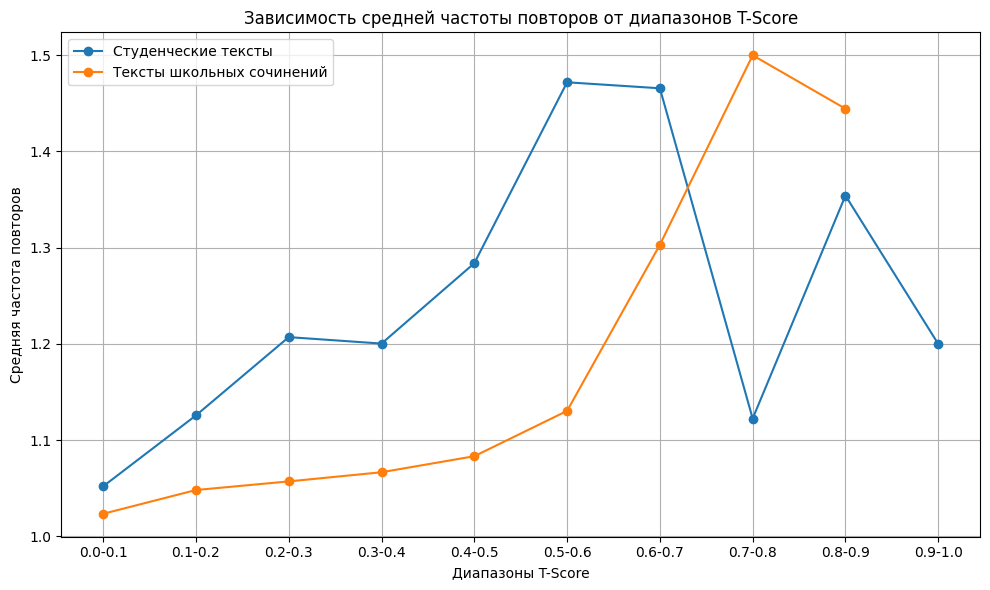


Данные и график успешно сохранены!


In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из JSON
with open('updated_america_texts_last.json', 'r', encoding='utf-8') as f:
    student_data = json.load(f)
with open('final_school.json', 'r', encoding='utf-8') as f:
    literature_data = json.load(f)

# Функция для извлечения данных с ненулевым T-Score
def extract_data(data):
    extracted = []
    for entry in data.values():
        bigrams = entry.get("bigrams_unique", {})
        for bigram, details in bigrams.items():
            t_score = details.get("t_score")
            frequency = entry["bigrams_freq"].get(bigram, 0)
            if t_score is not None and t_score > 0:
                extracted.append({"Bigram": bigram, "T-Score": t_score, "Frequency": frequency})
    return extracted

# Извлечение данных для обоих корпусов
student_bigrams = extract_data(student_data)
literature_bigrams = extract_data(literature_data)

# Создание DataFrame
student_df = pd.DataFrame(student_bigrams)
literature_df = pd.DataFrame(literature_bigrams)

# Определение диапазонов T-Score для группировки
bins = np.linspace(0, 1, 11)  # Диапазоны от 0 до 1 с шагом 0.1
labels = [f"{round(bins[i], 1)}-{round(bins[i+1], 1)}" for i in range(len(bins)-1)]

# Добавление диапазонов в DataFrame
student_df["T-Score Range"] = pd.cut(student_df["T-Score"], bins=bins, labels=labels, include_lowest=True)
literature_df["T-Score Range"] = pd.cut(literature_df["T-Score"], bins=bins, labels=labels, include_lowest=True)

# Группировка по диапазонам T-Score и вычисление среднего количества повторов
student_grouped = student_df.groupby("T-Score Range")["Frequency"].mean()
literature_grouped = literature_df.groupby("T-Score Range")["Frequency"].mean()

# Вывод данных текстом
print("Средняя частота повторов по диапазонам T-Score для студенческих текстов:")
print(student_grouped)
print("\nСредняя частота повторов по диапазонам T-Score для художественных текстов:")
print(literature_grouped)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(student_grouped.index.astype(str), student_grouped, marker='o', label='Студенческие тексты')
plt.plot(literature_grouped.index.astype(str), literature_grouped, marker='o', label='Тексты школьных сочинений')
plt.xlabel('Диапазоны T-Score')
plt.ylabel('Средняя частота повторов')
plt.title('Зависимость средней частоты повторов от диапазонов T-Score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("tscore_vs_repeats.png")
plt.show()

# Сохранение данных в Excel
output_df = pd.DataFrame({
    "T-Score Range": labels,
    "Student Average Frequency": student_grouped.values,
    "Literature Average Frequency": literature_grouped.values
})
output_df.to_excel("tscore_repeats_analysis.xlsx", index=False, sheet_name="T-Score Analysis")
print("\nДанные и график успешно сохранены!")